## Kaggle Project #1 - Bike Sharing Demand 

- Source: https://www.kaggle.com/c/bike-sharing-demand

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### Dataset
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

#### Evaluation metrics
$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }
$$

- n  is the number of hours in the test set
- pi is your predicted count
- ai is the actual count
- log(x) is the natural logarithm

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
test_df = pd.read_csv("./data/test.csv", parse_dates=["datetime"])
train_df = pd.read_csv("./data/train.csv", parse_dates=["datetime"])

In [19]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index()
all_df.head()

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [20]:
all_df.tail()

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
17374,6488,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,10.66,2,11.0014,1
17375,6489,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,10.66,2,11.0014,1
17376,6490,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,10.66,1,11.0014,1
17377,6491,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,10.66,1,8.9981,1
17378,6492,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,10.66,1,8.9981,1


In [21]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df),len(all_df)))

In [22]:
all_df.isnull().sum()

index            0
atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

In [153]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [24]:
submission_df = pd.read_csv("./data/sampleSubmission.csv")

In [25]:
rmsle(len(submission_df["count"]), submission_df["count"].values, 
      np.random.randint(0, 100, size=len(submission_df)))

3.753118284765335

In [26]:
del all_df["casual"]
del all_df["registered"]
del all_df["index"]

In [27]:
pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0


In [28]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"], prefix="weather"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0


In [29]:
pre_df["datetime"].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [30]:
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour
pre_df["weekday"] = pre_df["datetime"].dt.weekday

In [31]:
pre_df= pre_df.merge(pd.get_dummies(pre_df["weekday"], prefix="weekday"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,...,1,0,5,0,0,0,0,0,1,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,...,1,1,5,0,0,0,0,0,1,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,...,1,2,5,0,0,0,0,0,1,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,...,1,3,5,0,0,0,0,0,1,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,...,1,4,5,0,0,0,0,0,1,0


In [32]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season                 int64
temp                 float64
weather                int64
windspeed            float64
workingday             int64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [33]:
category_variable_list = ["season","weather","workingday","season_1","season_2","season_3","season_4","weather_1","weather_2","weather_3","weather_4","year","month","day","hour","weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [34]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season              category
temp                 float64
weather             category
windspeed            float64
workingday          category
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [35]:
train_df = pre_df.iloc[train_index]

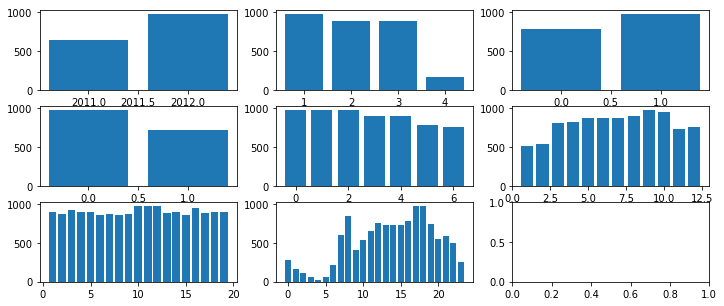

In [36]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12, 5)
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

In [37]:
serires_data = train_df.groupby(["year","month"])["count"].mean()
serires_data.index.tolist()[:5]

[(2011, 1), (2011, 2), (2011, 3), (2011, 4), (2011, 5)]

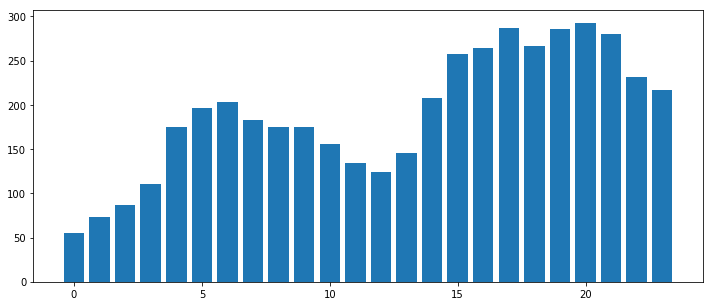

In [38]:
fig, ax = plt.subplots()
ax.bar(range(len(serires_data)), serires_data)
fig.set_size_inches(12,5)
plt.show()

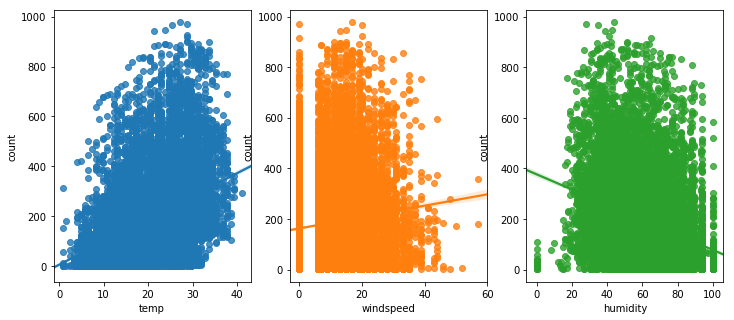

In [42]:
import seaborn as sn

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train_df,ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_df,ax=ax2)
sn.regplot(x="humidity", y="count", data=train_df,ax=ax3)
plt.show()

In [50]:
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [56]:
corrMatt = train_df[['season','weather']].corr()
corrMatt

""


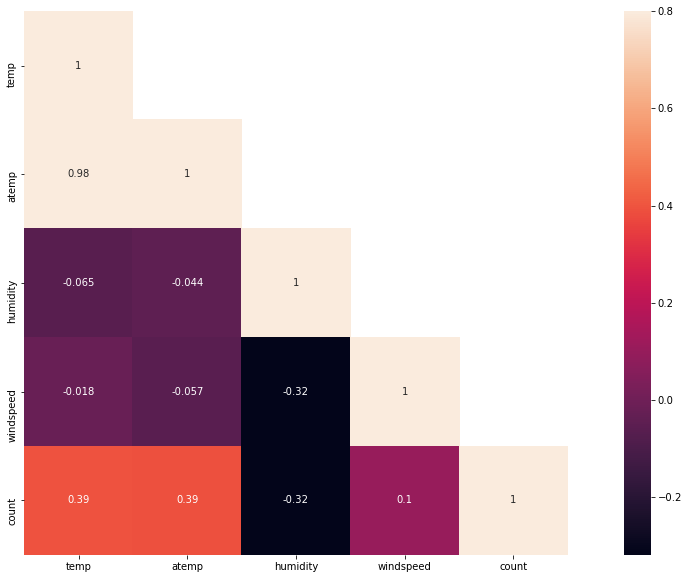

In [58]:
corrMatt = train_df[["temp","atemp","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

In [78]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [85]:
continuous_variable_list = ["temp","humidity","windspeed","atemp"]

In [86]:
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

In [87]:
category_varialbe_list = ["season","holiday","workingday","weather","weekday","month","year","hour"]

In [88]:
all_variable_list = continuous_variable_list + category_varialbe_list

In [89]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)


In [90]:
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [92]:
number_of_variables = len(all_variable_list)

In [188]:
varaible_combinations = []
import itertools
for L in range(1, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        varaible_combinations.append(temp)

In [189]:
del pre_df["count"]

KeyError: 'count'

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

kf= KFold(n_splits=10)

y = train_df["count"].values

final_output = []
print(len(varaible_combinations))
ts = datetime.datetime.now()
for i, combination in enumerate(varaible_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    pre_df.iloc
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(np.exp(np.log1p(y_test)), np.exp(lr.predict(X_test)) , False)
        lr_result.append(result)

        ridge.fit(X_train, y_train)
        result = rmsle(np.exp(np.log1p(y_test)), np.exp(ridge.predict(X_test)) , False)
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(np.exp(np.log1p(y_test)), np.exp(lasso.predict(X_test)) , False)
        lasso_result.append(result)
    
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    
    if i % 100 == 0:
        tf = datetime.datetime.now()
        te = tf - ts  
        print(i, te)
        ts = datetime.datetime.now()
        
print(final_output)

32767
0 0:00:00.098122


f:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
f:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
f:\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: overflow encountered in exp
f:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in square


In [ ]:
labels = ["combination", "lr","ridge", "lasso"]

from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
